# Lab 5 - Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## NFL Offense Data

In [2]:
# import csv
df3 = pd.read_csv("nfloffenseweek3.csv")
df4 = pd.read_csv("nfloffenseweek4.csv")
df5 = pd.read_csv("nfloffenseweek5.csv")
df_teams = pd.read_csv("nfl_teams.csv")

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [3]:

df3['week'] = 3
df4['week'] = 4
df5['week'] = 5

week_files = [df3,df4,df5]
df = pd.concat(week_files)

df = df.merge(df_teams, how='left',on="team")
df


,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,first_downs,...,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week,ID,Abbreviation,Conference,Division
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,44,5,42.9,8.6,35.63,3,3,BAL,AFC,North
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,129,5,40.5,5.4,31.05,3,11,DET,NFC,North
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,136,6,46.7,16.7,47.46,3,4,BUF,AFC,East
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,124,8,45.2,6.5,40.73,3,16,KC,AFC,West
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,173,6,39.4,3.0,45.06,3,24,PHI,NFC,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,28,Chicago Bears,5,86,1370,266,5.2,8,4,73,...,211,9,36.5,13.5,-5.91,5,6,CHI,NFC,North
92,29,Los Angeles Rams,5,80,1499,312,4.8,12,5,93,...,156,8,31.4,23.5,-19.19,5,29,LAR,NFC,West
93,30,Pittsburgh Steelers,5,77,1479,306,4.8,9,3,92,...,213,6,26.3,12.3,-25.01,5,25,PIT,AFC,North
94,31,Denver Broncos,5,75,1718,318,5.4,6,3,84,...,335,8,29.3,10.3,-18.28,5,10,DEN,AFC,West


In [4]:
df.columns

Index(['rank', 'team', 'games', 'points_scored', 'total_yards',
       'offensive_plays', 'yards_per_play', 'turnovers_lost', 'fumbles_lost',
       'first_downs', 'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_1st_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_1st_downs', 'penalties', 'penalty_yards', '1st_down_penalties',
       'percentage_scoring_drives', 'percentage_turnover_drives',
       'expected_points', 'week', 'ID', 'Abbreviation', 'Conference',
       'Division'],
      dtype='object')

2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

<Figure size 3168x2448 with 0 Axes>

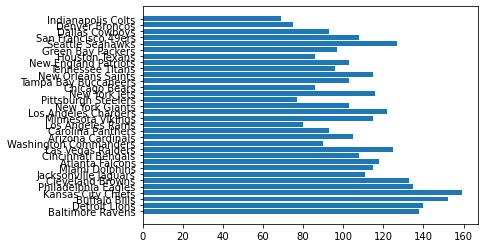

In [16]:
plt.figure(figsize=(12, 12))

barhplot = plt.barh(nfl_team.Name, nfl_team.ID)
avg_num = df.groupby("team").points_scored.mean()
avg_num
#plt.title("Average number of Points")
#plt.xlabel("Points")
#plt.ylabel("Teams")
#plt.show()
fig, ax = plt.subplots()
ax.barh(df.team, df.points_scored, linewidth=1)
#plt.bar_label(barhplot, labels = "size")
#barhplot
plt.show()

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

C:\Users\kodom\AppData\Local\Temp\ipykernel_39700\3848125448.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_pass_rush = df.groupby('Abbreviation')['passing_yards','rushing_yards'].mean()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x1440 with 0 Axes>

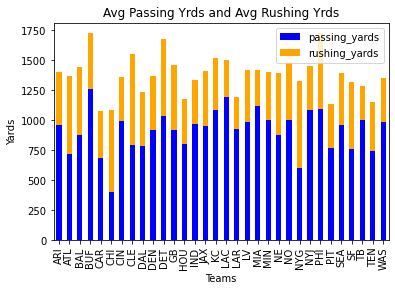

In [ ]:
avg_pass_rush = df.groupby('Abbreviation')['passing_yards','rushing_yards'].mean()
avg_pass_rush

plt.figure(figsize=(25,20))

avg_pass_rush.plot(kind='bar', stacked=True, color=['blue','orange'])
plt.title("Avg Passing Yrds and Avg Rushing Yrds")
plt.xlabel("Teams")
plt.ylabel("Yards")

plt.show

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

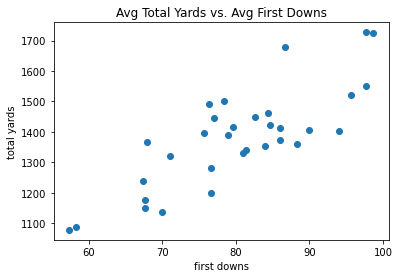

In [21]:
yards = df.groupby("team").total_yards.mean()
yards
first_down = df.groupby("team").first_downs.mean()
first_down
plt.scatter(first_down, yards)

plt.title("Avg Total Yards vs. Avg First Downs")
plt.xlabel("first downs")
plt.ylabel("total yards")
plt.show()

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

Text(0.5, 1.0, 'Penalty Yards for Baltimore Ravens and LA Rams')

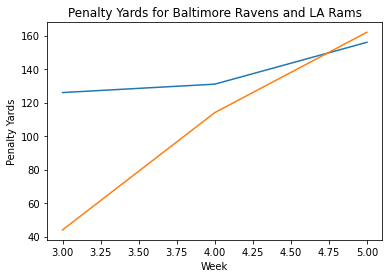

In [73]:
plt.figure()
team_one = df[df.team == "Baltimore Ravens"]
team_two = df[df.team == "Los Angeles Rams"]
#nfl_team.set_index(['name']).plot()

plt.plot(team_two.week, team_two.penalty_yards)
plt.plot(team_one.week, team_one.penalty_yards)

plt.xlabel("Week")
plt.ylabel("Penalty Yards")
plt.title("Penalty Yards for Baltimore Ravens and LA Rams")


6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

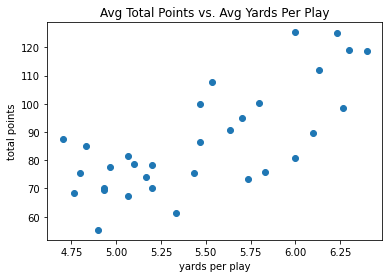

In [ ]:
avg_yar = df.groupby("team").yards_per_play.mean()
avg_yar

tot_pt = df.groupby("team").points_scored.mean()
tot_pt

plt.scatter(avg_yar, tot_pt)
plt.title("Avg Total Points vs. Avg Yards Per Play")
plt.xlabel("yards per play")
plt.ylabel("total points")
plt.show()

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

Text(0.5, 1.0, 'NUmber of penalty yards for teams in the NFC West')

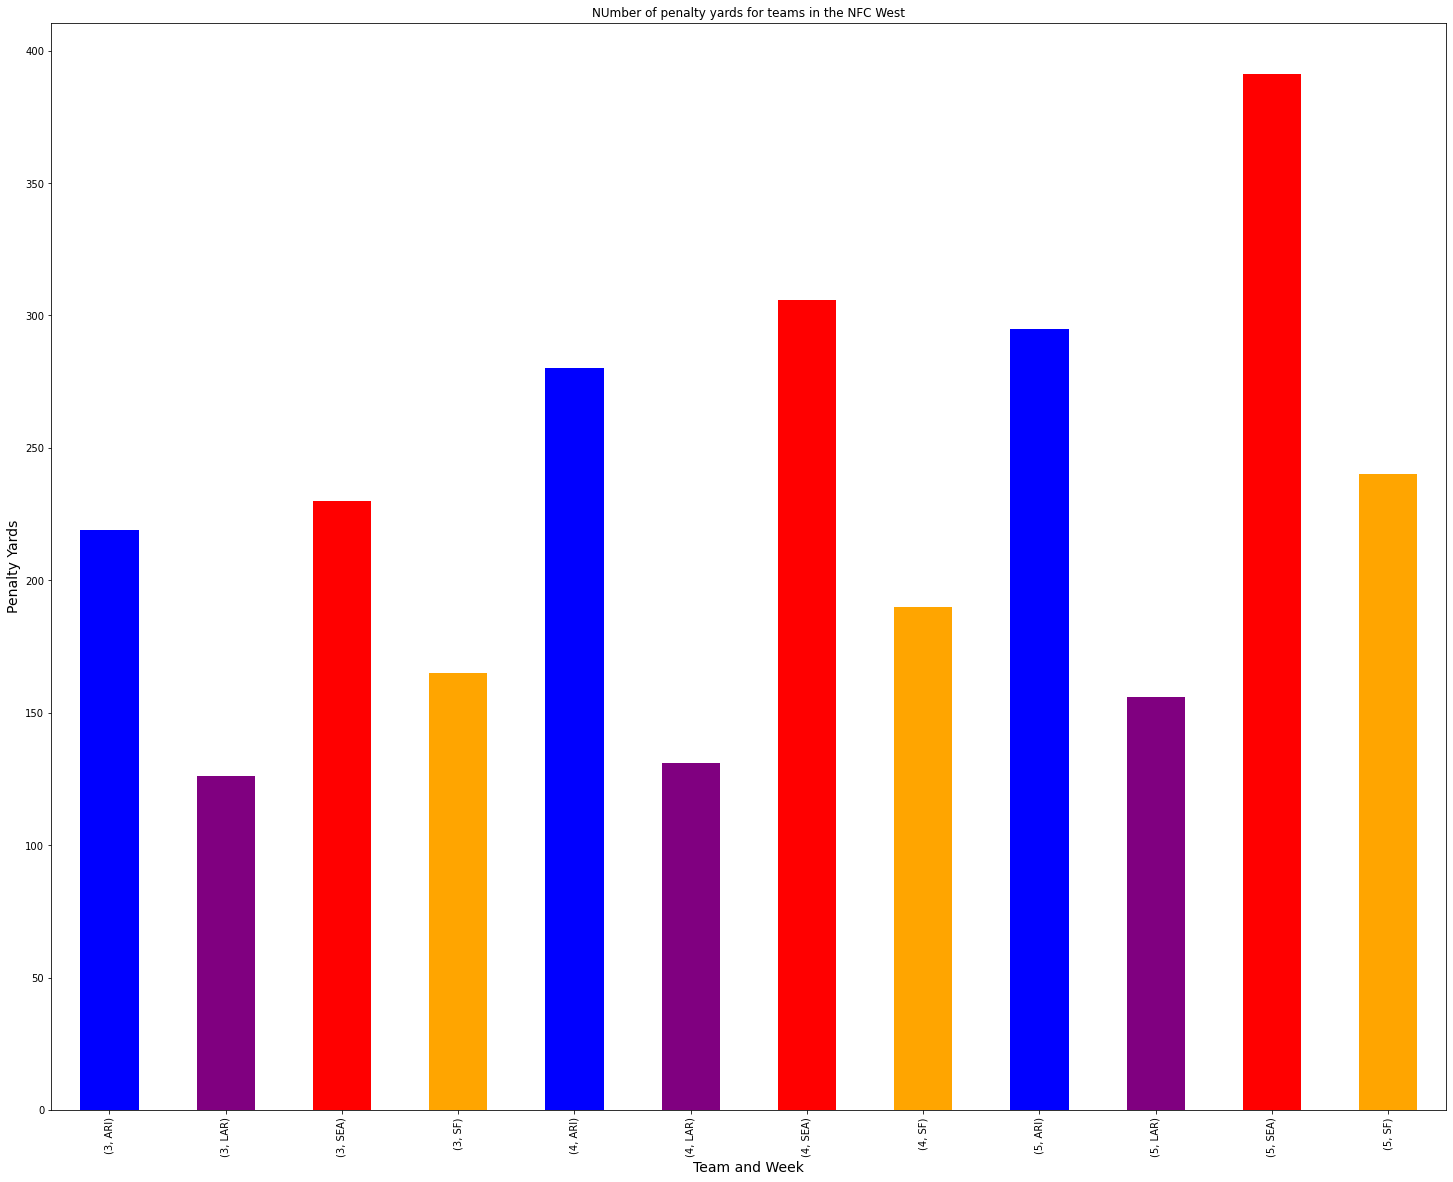

In [71]:
mask = (
    (df.Conference == "NFC") &
    (df.Division == "West")
)
mask
#cof_div = df[(df.Conference == 'NFC') & (df.Division == 'West')]
answer = df[mask].groupby(['week','Abbreviation']).penalty_yards.mean()
answer

plt.figure(figsize=(25,20))
answer.plot(kind='bar', color=['blue','purple','red','orange'])
plt.xlabel("Team and Week", fontsize=14)
plt.ylabel("Penalty Yards", fontsize=14)
plt.title('NUmber of penalty yards for teams in the NFC West')


8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

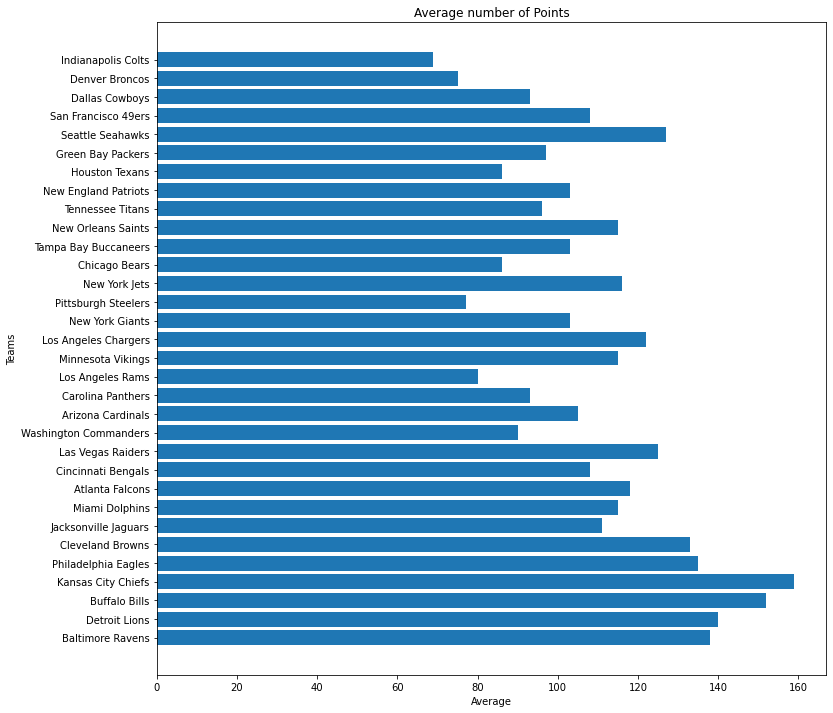

In [78]:
answer = df.groupby(['Conference','Division']).points_scored.mean()
answer

plt.figure(figsize=(12, 12))
plt.barh(df.team,df.points_scored)
plt.title("Average number of Points")
plt.xlabel("Average")
plt.ylabel("Teams")
plt.show()

([<matplotlib.axis.XTick at 0x1b93a3a7670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

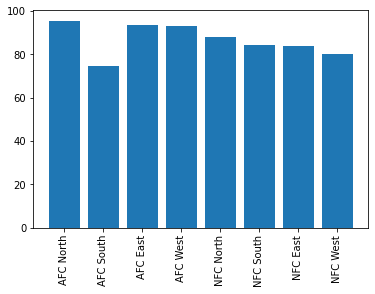

In [77]:
conf_list = ['AFC', 'NFC']
division = ['North', 'South','East','West']
x = []
y = []

for conf in conf_list:
    for div in division:
        merged = (df['Conference'] == conf) & (df['Division'] == div)
        points_ave = df[merged].points_scored.mean()
        x.append(f'{conf} {div}')
        y.append(points_ave)
plt.bar(x,y)
plt.xticks(x, rotation = 'vertical')